# Digital Repression 

# &

# Political Regimes

--------------------------------------------------------------------------------------------------------------------------------------------------

### A Global Panorama


# hypothesis

We are going to study the relationship between democratic quality and digital repression. We want to answer questions like:
 - is it true that the least democratic countries are always the most repressive?
 - what exactly is digital repression?
 - what repressive methods characterize the different political regimes?

# sources

Feldstein, Steven (2022), “AI & Big Data Global Surveillance Index (2022 updated)”, 
https://data.mendeley.com/datasets/gjhf5y4xjp/4

Varieties of Democracy (V-Dem),
https://www.v-dem.net/


# dataset

We have data from up to 179 countries, including regime type, democratic quality index, and levels of digital repression.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
%matplotlib inline

In [14]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings("ignore")
import plotly.io as plt_io

In [6]:

df = pd.read_csv('../data/DR_DI.csv')
df.shape

(179, 15)

In [10]:
df.head().append(df.tail())

,Country,Region,Year,v2x_polyarchy,v2x_libdem,v2x_regime,Digital Repression Index 2021,Gov SM surveillance v2smgovsmmon,Gov disinfo v2smgovdom,Pol party disinfo v2smpardom,Gov filtering v2smgovfilprc,Gov internet shutdowns v2smgovshut,Gov SM Shutdown v2smgovsm,Gov SM censorship v2smgovsmcenprc,Arrests online users (v2smarrest)
0,Afghanistan,SCA,2021,0.160,0.021,CA,0.817572,1.054,1.564,2.702,0.941,-0.202,0.710,-0.427,2.164
1,Albania,EUR,2021,0.478,0.403,EA,-0.291090,0.151,0.310,-0.130,0.117,-0.806,-1.582,-0.912,-1.250
2,Algeria,MENA,2021,0.284,0.145,EA,1.353596,2.140,1.675,0.594,1.720,1.383,1.974,1.302,1.370
3,Angola,AFR,2021,0.351,0.190,EA,-0.251762,0.129,-0.233,0.419,-0.879,-0.374,-0.608,-0.875,-1.048
4,Argentina,WHA,2021,0.819,0.658,ED,-1.131260,-0.507,-0.925,-1.205,-2.233,-1.849,-1.827,-1.670,-2.632
174,Vietnam,EAP,2021,0.220,0.126,CA,0.891468,1.522,0.932,-0.523,2.060,-0.344,0.119,1.515,2.367
175,Yemen,MENA,2021,0.112,0.033,CA,1.509764,1.385,2.543,2.754,1.826,1.248,1.226,1.881,2.073
176,Zambia,AFR,2021,0.379,0.296,EA,0.387025,1.405,0.953,2.501,-0.098,-0.127,-0.179,-1.000,0.893
177,Zanzibar,AFR,2021,0.263,0.198,EA,0.461811,0.729,0.522,0.345,-0.628,0.006,0.194,1.269,1.346
178,Zimbabwe,AFR,2021,0.281,0.189,EA,1.022687,1.153,2.169,2.392,0.445,0.659,0.428,0.579,2.552


- we change the column names to more explanatory ones:

In [12]:
df.rename(columns = 
{'v2x_libdem':'V-Dem Index',
'v2x_regime':'Regime type',
'Gov SM surveillance v2smgovsmmon':'SM surv.', 
'Gov filtering v2smgovfilprc':'Filtering', 
'Gov SM censorship v2smgovsmcenprc':'SM cens.',  
'Gov disinfo v2smgovdom':'GOV disinfo', 
'Pol party disinfo v2smpardom':'PP disinfo', 
'Gov internet shutdowns v2smgovshut':'Internet shutd.', 
'Gov SM Shutdown v2smgovsm':'SM shutd.',
'Arrests online users (v2smarrest)':'Arrests',
}, 
inplace = True)

# The 4 types of regimes


- Factors to measure the democracy index 'V-Dem Democracy Index':
The index is based on two principles: electoral, and liberal.

'Electoral' refers to how representative the system is, taking into account whether the elections are fair and free, and whether there are independent media in the country in question.

'Liberal' refers to measures on the rule of law and the rule of law, transparency, or civil liberties.


- Classification of regimes:
The V-Dem Democracy Index is used to characterize and classify political regimes. This is important in order to be able to detect when one enters or leaves each of them, that is, at what point democracy erodes and approaches autocracy, or, conversely, when a regime advances from autocracy towards democracy.

We then have 4 types of regimes:
- liberal democracies (LD)
- electoral democracies (ED)
- electoral autocracies (EA)
- closed autocracies (CA)

![alt text](../img/regimens.png "Title")

![imagen](../img/regimens.png)

Copyright!!!

## Let's look at the Indices of Democracy and Repression of all countries:

In [18]:
import plotly.graph_objs as go

trace1 = go.Scatter(x = df['V-Dem Index'],
                    y = df['Country'],
                    name = 'V-Dem Index', 
                    mode= 'lines', 
                    marker = dict(color = 'rgba(0,255,0, 0.5)'), 
                    text = df['Country']) 

trace2 = go.Scatter(x = df['Digital Repression Index 2021'],
                    y = df['Country'],
                    name = 'Digital Repression Index 2021',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(255,255,0, 0.5)'),
                    text = df['Country'])

data = [trace1, trace2]
layout = dict(title = 'V-Dem Index and Digital Repression Index 2021')
fig = go.Figure(data = data, layout=layout)
fig.update_layout(
    width=1000,
    height=3000)

fig.layout.template = 'plotly_dark'

iplot(fig)

In [ ]:
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Count of countries according to their type of regime

We have 179 countries in the dataset (currently there are 193, but 14 have limited international recognition).
However, it does seem to us a significant sample space, although discouraging: more than half of the countries are not democracies.



c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


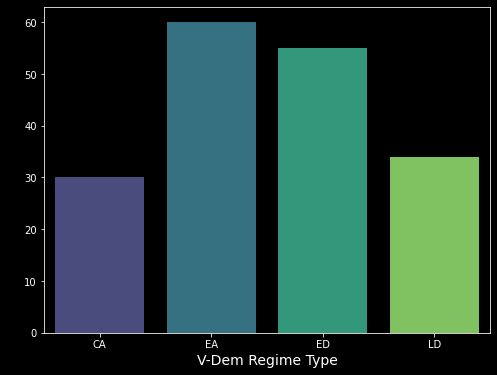

In [13]:
plt.style.use('dark_background')  

plt.figure(figsize=(8,6))
sns.countplot(df['Regime type'], palette='viridis')
plt.xlabel('V-Dem Regime Type', fontsize=14)
plt.ylabel(' ', fontsize=12);

## Veamos la distribución regional de los distintos regímenes:
- Sur y centro de Asia (SCA)
- Europa (EUR)
- Oriente medio y norte de África (MENA)
- África central y meridional (AFR)
- América (WHA)
- Asia oriental y Pacífico (EAP)

<Figure size 2880x2160 with 0 Axes>

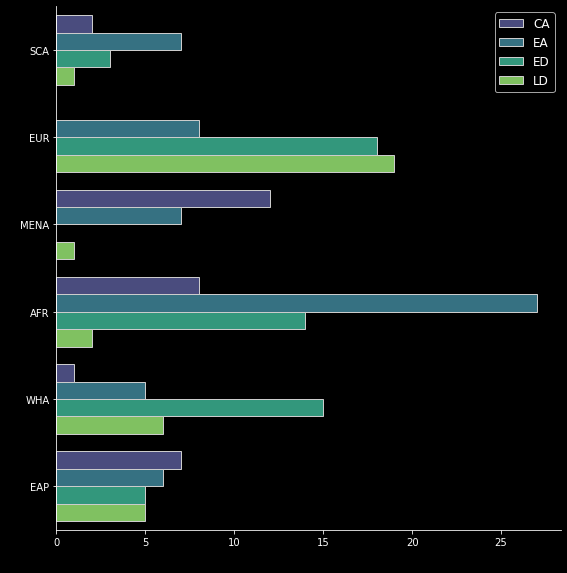

In [11]:
plt.figure(figsize=(40,30))

sns.catplot(y="Region", 
            hue="Regime type", 
            palette='viridis',
            kind="count",
            edgecolor=".8",
            orient = "H",
            height = 8, 
            data=df,
            legend= False,)

plt.xlabel(' ', fontsize=16)
plt.ylabel(' ', fontsize=8)
plt.legend(loc='upper right', prop={'size': 12});
plt.show()

Vemos que el índice de democracia V-dem medio varía significativamente entre regiones:
- las regiones menos democráticas son Oriente medio y norte de África (MENA), Sur y centro de Asia (SCA) y África central y meridional (AFR)
- las más democráticas son Europa (EUR), América (WHA) y Asia oriental y Pacífico (EAP)

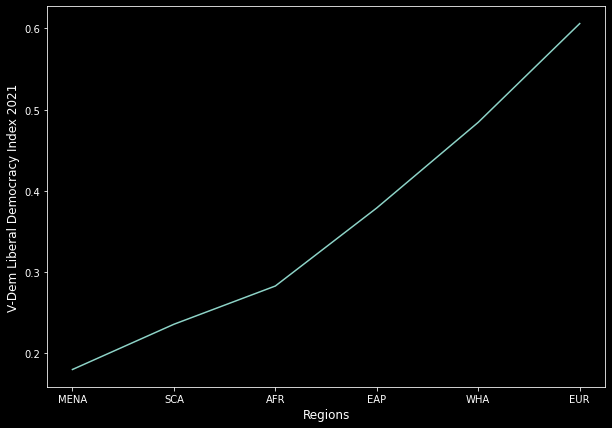

In [12]:
df.groupby('Region')[['V-Dem Index']].mean().sort_values(by='V-Dem Index', ascending=True).plot(figsize=(10, 7), legend=False);
plt.xlabel('Regions', fontsize=12)
plt.ylabel('V-Dem Liberal Democracy Index 2021', fontsize=12);

También lo hace el Índide de Represión Digital de 2021 medio:
- las regiones más represivas digitalmente son el Sur y centro de Asia (SCA), Oriente medio y norte de África (MENA), África central y meridional (AFR),  y Asia oriental y Pacífico (EAP), todas con valores positivos;
- las menos represivas, con valores bajo 0, son Europa (EUR) y América (WHA).


In [14]:
df.groupby('Region')[['Digital Repression Index 2021']].mean().sort_values(by='Digital Repression Index 2021', ascending=True)

,Digital Repression Index 2021
Region,
EUR,-0.751870
WHA,-0.363332
EAP,0.075865
AFR,0.277209
MENA,0.784244
SCA,0.928976


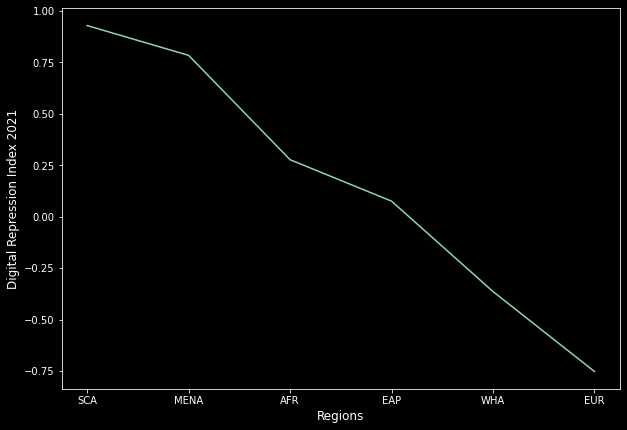

In [13]:
df.groupby('Region')[['Digital Repression Index 2021']].mean().sort_values(by='Digital Repression Index 2021', ascending=False).plot(figsize=(10, 7), legend=False);
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Digital Repression Index 2021', fontsize=12);
#plt.legend('V-Dem Liberal Democracy Index 2021', loc='upper right', prop={'size': 18});

Estudiamos la varible Índice de Represión Digital 2021, que engloba distntos valores que veremos más adelante:

- no presenta valores anómalos: todos los países mantienen niveles entre -1.5 y 3 aproximadamente, sin que ninguno se desmarque.

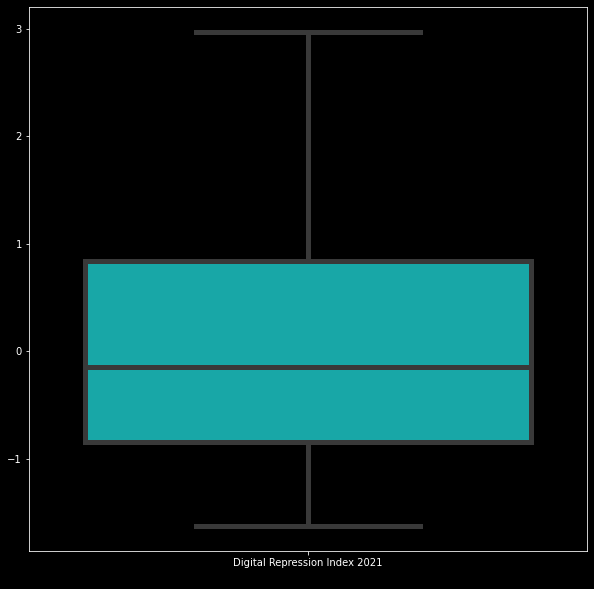

In [15]:
plt.figure(figsize=(10,10))
dri21 = df.iloc[::,6:7]
sns.boxplot(data=dri21, linewidth=5, color='c')
plt.xlabel(" ");

- la media y la mediana están muy próximas
- los países menos represivos están en valores por debajo de 0
- los más represivos, por encima
- observamos que unos pocos países tienen niveles muy elevados, por encima de 1.5

<Figure size 720x720 with 0 Axes>

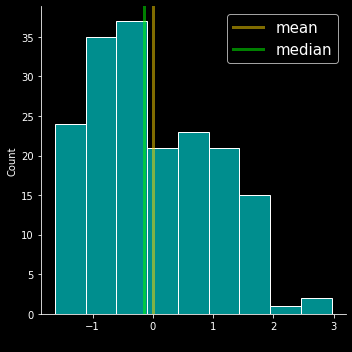

In [16]:
plt.figure(figsize=(10,10))

sns.displot(df["Digital Repression Index 2021"], kde=False, color='c')
plt.axvline(x=df['Digital Repression Index 2021'].mean(), linewidth=3, color='gold', label="mean", alpha=0.5)
plt.axvline(x=df['Digital Repression Index 2021'].median(), linewidth=3, color='lime', label="median", alpha=0.5);

plt.xlabel(" ")
plt.legend(["mean", "median"], prop={'size': 15})
plt.show()

Como vemos abajo, sí existe una relación entre el Índice de Represión Digital 2021 y los tipos de regímenes:

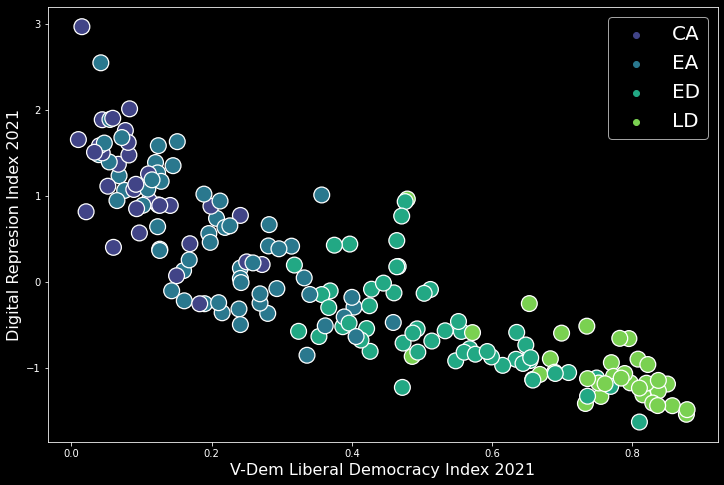

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['V-Dem Index'],
                y=df['Digital Repression Index 2021'],
                hue = df['Regime type'], 
                palette='viridis',
               s=250);
plt.xlabel('V-Dem Liberal Democracy Index 2021', fontsize=16)
plt.ylabel('Digital Represion Index 2021', fontsize=16)
plt.legend(loc='upper right', prop={'size': 20});

## ¿Qué índices tiene cada país?

In [23]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings("ignore")
import plotly.io as plt_io

In [24]:
import plotly.graph_objs as go

trace1 = go.Scatter(x = df['V-Dem Index'],
                    y = df['Country'].sort_values(),
                    name = 'V-Dem Index', # nombre dela línea
                    mode= 'lines', # modo de la línea
                    marker = dict(color = 'rgba(0,255,0, 0.5)'), # color
                    text = df['Country']) #texto

trace2 = go.Scatter(x = df['Digital Repression Index 2021'],
                    y = df['Country'].sort_values(),
                    name = 'Digital Repression Index 2021',
                    mode= 'lines+markers',
                    marker = dict(color = 'rgba(255,255,0, 0.5)'),
                    text = df['Country'])

data = [trace1, trace2]
layout = dict(title = 'V-Dem Index and Digital Repression Index 2021')
fig = go.Figure(data = data, layout=layout)
fig.update_layout(
    width=1000,
    height=3000)

fig.layout.template = 'plotly_dark'

iplot(fig)

## Variables de represión digital

Hemos visto la variable generalista 'Digital Repression Index 2021', pero vamos a trabajar con otras más específicas para entender mejor las prácticas en que consiste.

La represión digital se mide con 8 variabes, distribuidas en 5 categorías:

1. Vigilancia: cómo de comprehensivo es el monitoreo del contenido político en las redes sociales llevado a cabo por el gobierno y sus agentes.
2. Censura de información y/o contenidos políticos: 
    - frecuencia de uso de filtros en Internet: uso de herramientas que impiden a un usuario acceder a diferentes sitios web, aplicaciones, plataformas, servicios sobre Internet, etc.
    - grado de censura fáctica en redes sociales 
3. Manipulación y desinformación social, o sea, difusión de puntos de vista engañosos e información falsa para influir a la población, por parte de:
    - el gobierno y sus agentes
    - los partidos políticos y sus candidatos
4. Bloqueos al acceso de:
    - Internet
    - redes sociales
5. Arrestos de usuarios por postear contenido político en la red .


Estudiamos las 8 variables para detectar países que se alejen excepcionalmente de los valores típicos:

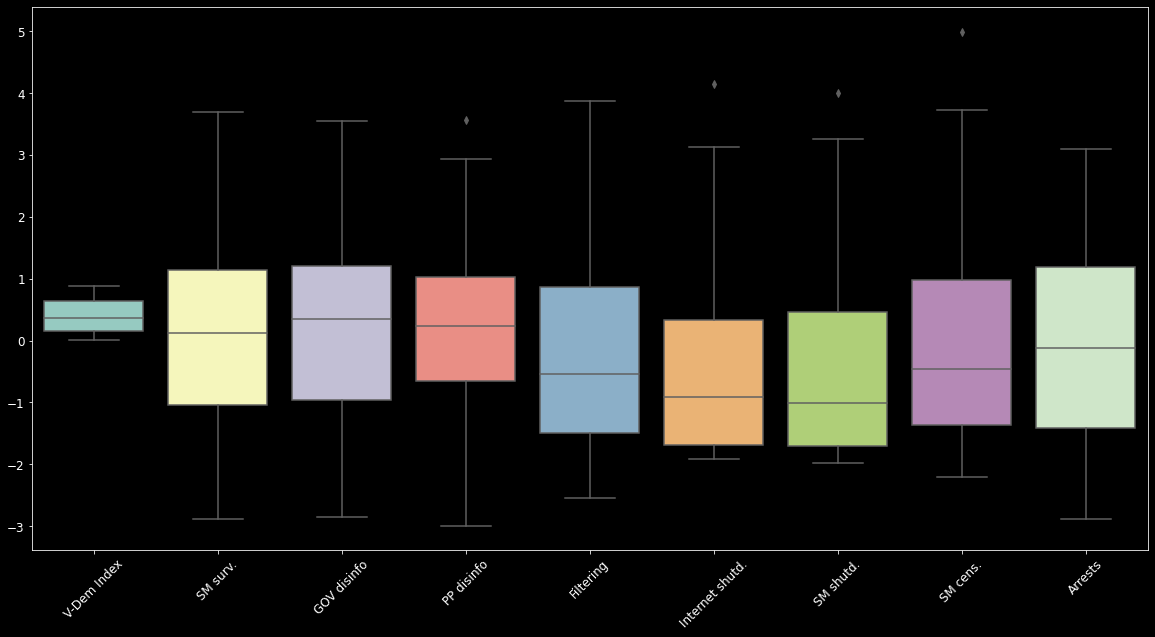

In [25]:
df_small = df.drop(columns=['Year','v2x_polyarchy','Digital Repression Index 2021', 'AIGS?'])

plt.figure(figsize=(20,10))
sns.boxplot(data=df_small, orient=90)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12)
plt.show();

Localizamos los valores atípicos: como pueden desvirtuar el análisis, hay que estudiar si conviene eliminarlos o no:

In [26]:
df_small[['PP disinfo','Internet shutd.','SM shutd.','SM cens.']].max()

PP disinfo         3.566
Internet shutd.    4.147
SM shutd.          4.010
SM cens.           4.996
dtype: float64

In [27]:
df_small[df_small['PP disinfo'] == 3.566]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
164,Turkmenistan,SCA,0.042,EA,2.445,3.555,3.566,3.194,3.134,3.261,3.734,2.12


In [28]:
df_small[df_small['Internet shutd.'] == 4.147]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
113,North Korea,EAP,0.015,CA,3.689,2.627,2.127,3.869,4.147,4.01,4.996,3.091


In [29]:
df_small[df_small['SM shutd.'] == 4.01]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
113,North Korea,EAP,0.015,CA,3.689,2.627,2.127,3.869,4.147,4.01,4.996,3.091


In [30]:
df_small[df_small['SM cens.'] == 4.996]

,Country,Region,V-Dem Index,Regime type,SM surv.,GOV disinfo,PP disinfo,Filtering,Internet shutd.,SM shutd.,SM cens.,Arrests
113,North Korea,EAP,0.015,CA,3.689,2.627,2.127,3.869,4.147,4.01,4.996,3.091


Vemos que Corea del Norte es el único valor anómalo de tres variables, vamos a eliminarlo del análisis.

In [31]:
df_after = df_small.copy()
df_after.shape

(179, 12)

In [32]:
df_after.drop([113], inplace=True)
df_after.shape

(178, 12)

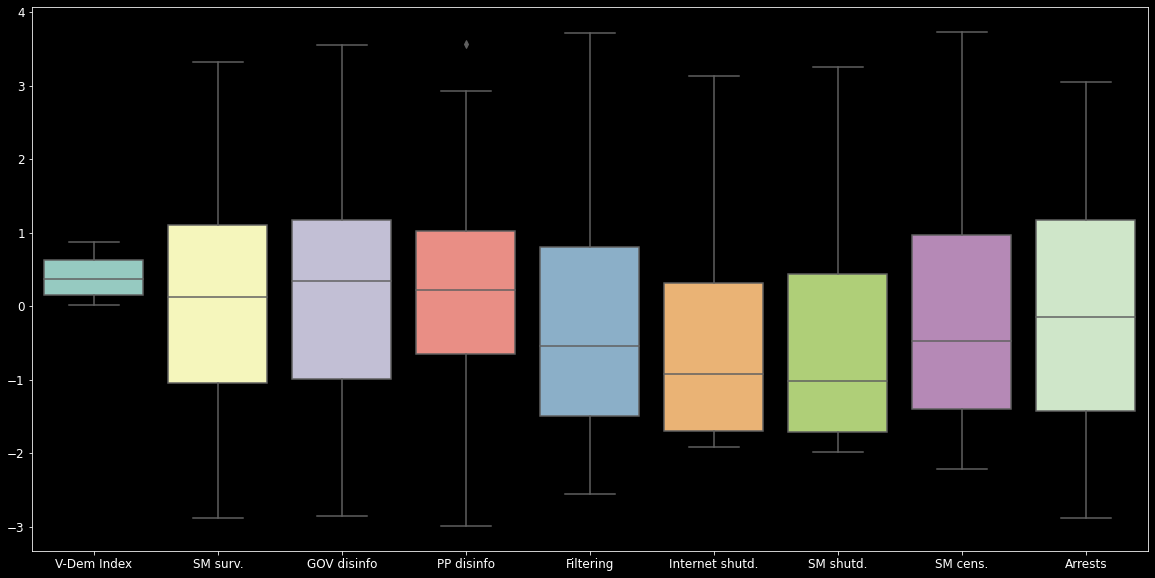

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_after)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show();

# Comparación de cada variable de represión digital según el tipo de régimen

## 1. ¿Qué valores tienen las distintas prácticas represivas según el tipo de régimen?

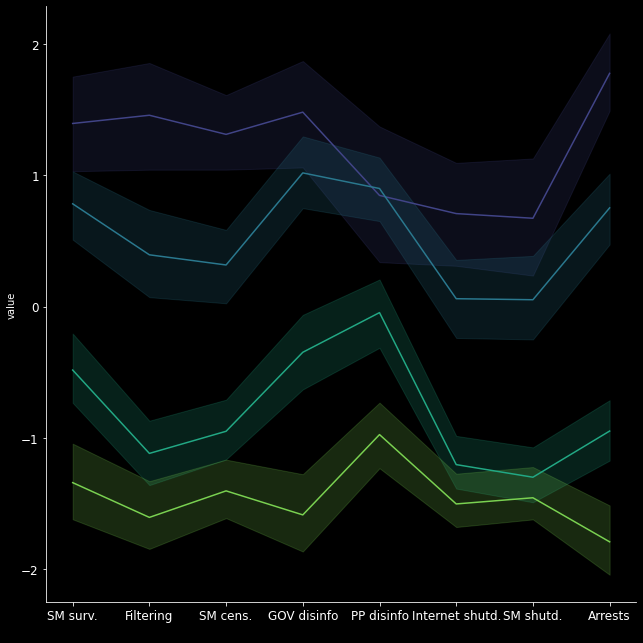

In [34]:
df_melted = df_after.melt(id_vars=['Country', 'Region', 'V-Dem Index', 'Regime type'], 
                        value_vars=[
                        'SM surv.', 
                        'Filtering', 
                        'SM cens.',
                        'GOV disinfo', 
                        'PP disinfo', 
                        'Internet shutd.',
                        'SM shutd.',
                        'Arrests'], 
                        var_name=' ')
colors = ['#414487FF','#2A788EFF','#22A884FF','#7AD151FF']
sns.relplot(data=df_melted, x = ' ', y = 'value', kind = 'line', hue = 'Regime type', palette=colors, height=9, legend=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

 - ## Rasgos de las autocracias
Observamos que tanto las autocracias cerradas como las electorales tienen niveles casi coincidentes de desinformación proveniente de los partidos políticos ('PP disinfo'), es decir, la alta frecuencia de difusión de información falsa por parte de partidos y candidatos es parecida en todo tipo de autocracias, desapareciendo la diferenciación entre las electorales y las cerradas. En menor medida, ambas autocracias también mantienen niveles parecidos de desinformación del gobierno ('GOV disinfo').

 - ## Rasgos de las democracias
Respecto a las democracias, vemos que tanto las liberales como las electorales no difieren mucho respecto a los bloqueos de Internet y redes sociales('Internet shut.' y 'SM shut.'), o sea, las democracias están de acuerdo en mantener bajos niveles de cierres en la red, siendo especialmente cautas respecto a las redes sociales.
En menor medida, ambas mantienen niveles no muy alejados de censura mediante filtrado en Internet ('Filtering') y contenidos en redes sociales ('SM cens.').

## 2. ¿Cómo se relacionan las prácticas represivas con el índice de democracia V-dem?

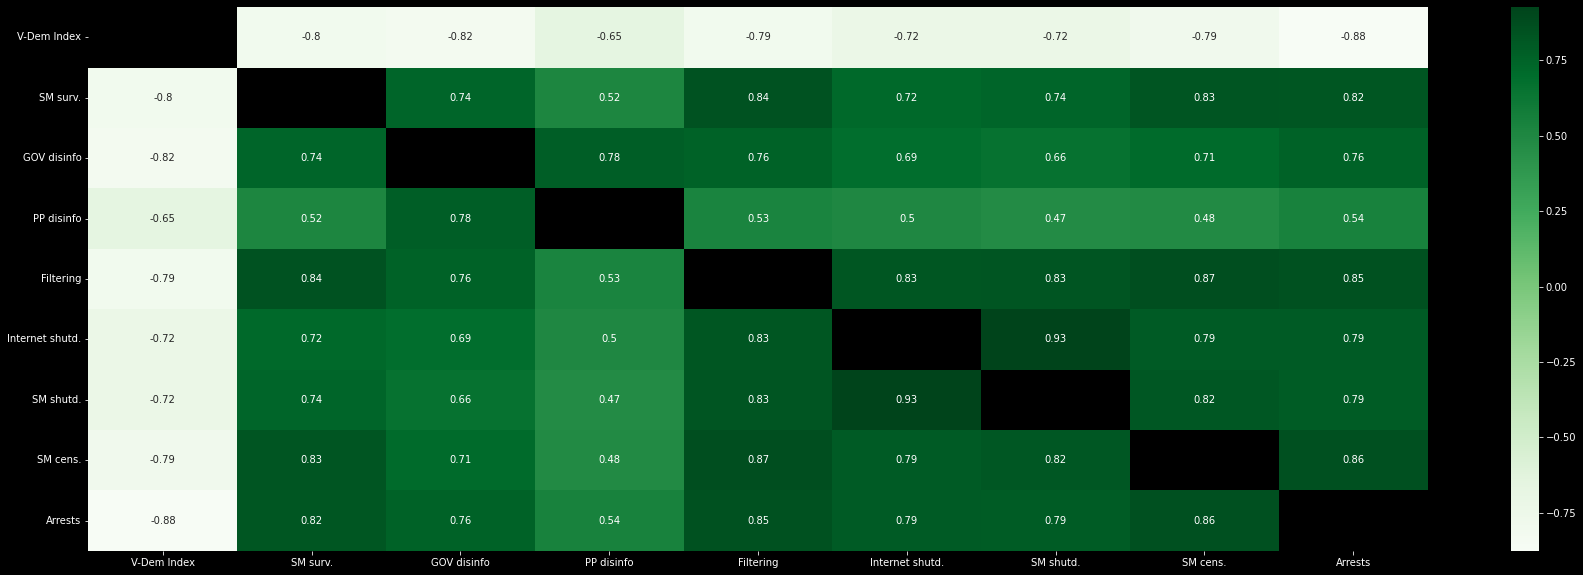

In [51]:
df_corr = df_after.corr()
df_filtered = df_corr[((df_corr >= .4) | (df_corr <= -.4)) & (df_corr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(df_filtered, annot=True, cmap="Greens")
plt.show()

## ¿Qué índices aumentan con mayor severidad según desciende la calidad democrática?
Podemos afirmar que, a peor calidad democrática, todos los índices de represión digital aumentan, especialmente:
- Arrestos por postear contenido político ('Arrests')
- Desinformación por parte de los gobiernos ('GOV disinfo')
- Vigilancia de las Redes Sociales ('SM surv.')
- Censura, tanto de RRSS como por filtrados de Internet ('SM cens.' y 'Filtering')


## Arrestos por postear contenido político ('Arrests'):

<Figure size 1080x720 with 0 Axes>

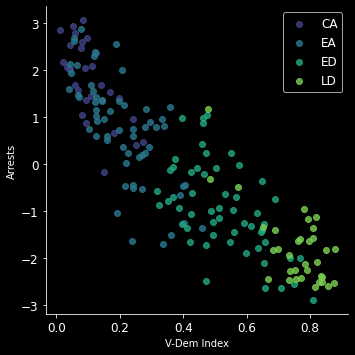

In [37]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="Arrests", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

## Desinformación por parte de los gobiernos ('GOV disinfo'):

<Figure size 1080x720 with 0 Axes>

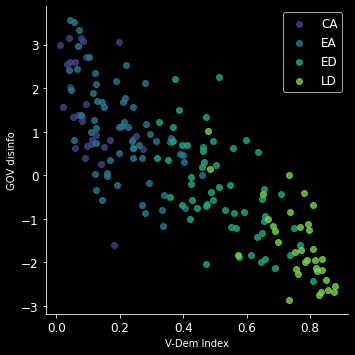

In [38]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="GOV disinfo", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

## Vigilancia de las Redes Sociales ('SM surv.'):

<Figure size 1080x720 with 0 Axes>

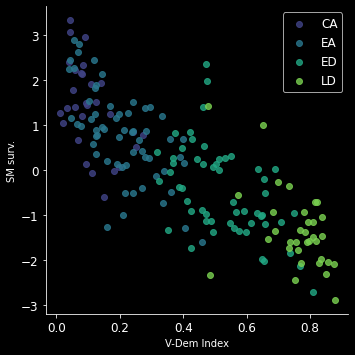

In [39]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="SM surv.", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

## Censura por filtrado en Internet ('Filtering'):

<Figure size 1080x720 with 0 Axes>

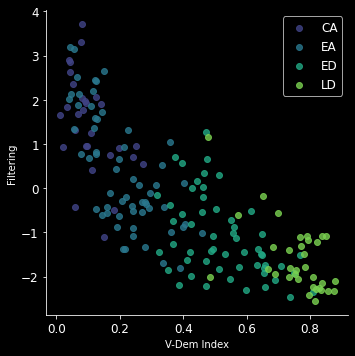

In [41]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="Filtering", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});

## Censura en RRSS ('SM cens.'):

<Figure size 1080x720 with 0 Axes>

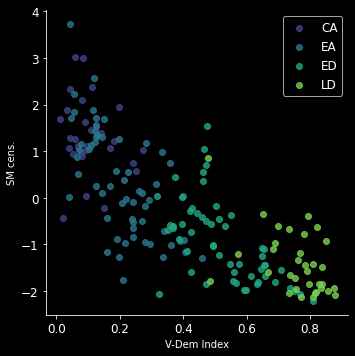

In [42]:
plt.figure(figsize=(15,10))
sns.lmplot(x="V-Dem Index", y="SM cens.", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(loc='upper right', prop={'size': 12});



## ¿Qué índice de represión digital está menos relacionado con el índice de democracia?
La desinformación por parte de los partidos políticos. 

Esto significa que la difusión de información falsa y/o puntos de vista engañosos por parte de los partidos políticos y/o de sus candidatos existe en casi todo el espectro de los regímenes políticos, aunque hay una notable diferencia respecto a las democracias liberales. 

Observamos que en una gran cantidad de democracias electorales, la desinformacón difundida por los partidos políticos y sus candidatos está al nivel de algunas autocracias.

<Figure size 1080x720 with 0 Axes>

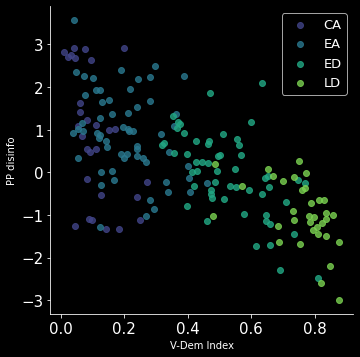

In [43]:
plt.figure(figsize=(15,10))

sns.lmplot(x="V-Dem Index", y="PP disinfo", data=df_after, hue="Regime type", palette='viridis',legend=False, fit_reg=False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 13})
plt.show()

## 3. ¿Existe alguna relación entre los diferentes tipos de represión digital?

Observamos cómo todas las prácticas represivas (salvo la desinformación de partidos políticos 'PP disinfo') están relacionadas entre sí, es decir, el aumento de una de ellas conlleva en mayor o menor medida, el aumento de casi todas las demás. Vamos a identificar las más relacionadas.

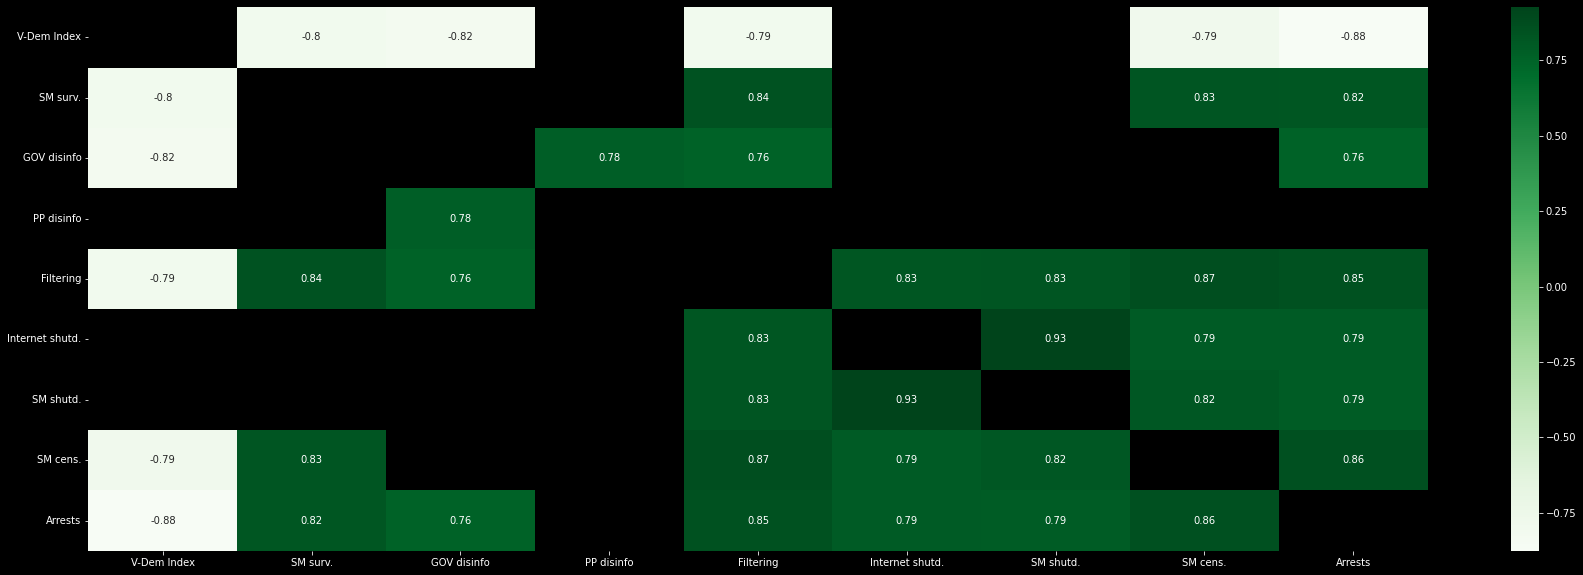

In [46]:
df_corr = df_after.corr()
df_filtered = df_corr[((df_corr >= .75) | (df_corr <= -.75)) & (df_corr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(df_filtered, annot=True, cmap="Greens")
plt.show()

1. A mayor frecuencia de censura por filtrado, mayores índices de:
- Monitoreo de contenido o información política redes sociales
- Desinformación por parte del gobierno y sus agentes
- Bloqueos de Internet y redes sociales
- Censura de contenido político en redes sociales
- Arrestos por postear contenido político

2. Cuanto mayor es el monitoreo de contenido político, más aumentan:
- la censura (filtros en a red y eliminación de contenidos en redes sociales)
- los arrestos de internautas

## Bloqueos al acceso de Internet y redes sociales

Son las dos prácticas más relacionadas entre sí (con un índice de correlación cercano a 1):

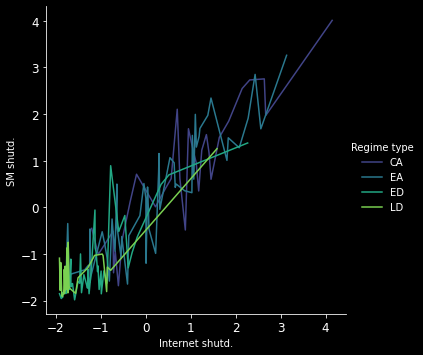

In [45]:
sns.relplot(x="Internet shutd.", y="SM shutd.", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

## Desinformación de partidos políticos

Cuanto más desinforman los partidos, más lo hacen los gobiernos, y viceversa. Observamos que las autocracias destacan en ambos aspectos.

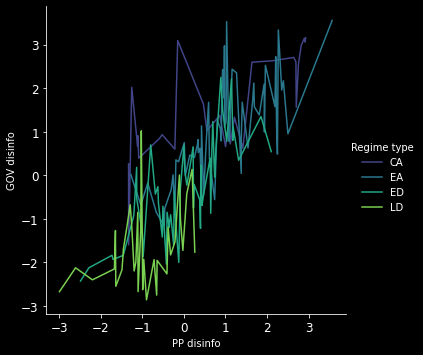

In [90]:
# plt.figure(figsize=(15,10))

sns.relplot(x="PP disinfo", y="GOV disinfo", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);


## Vigilancia de las Redes Sociales

A mayor vigilancia de las redes sociales, aumentan los arrestos por postear contenido político, la censura en redes sociales, y el filtrado en Internet.

## Arrestos por postear contenido político

Al aumentar la vigilancia del gobierno y sus agentes, aumentan los arrestos por postear contenido político, la censura en redes sociales, y el filtrado en Internet. 

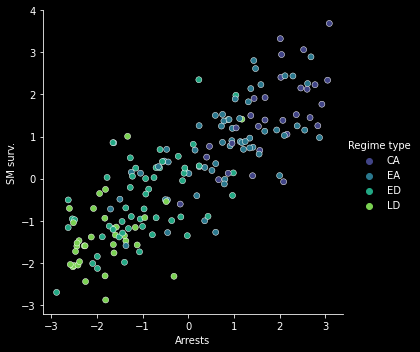

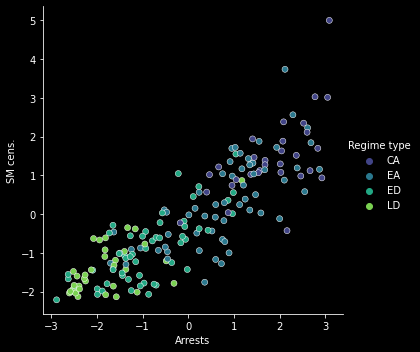

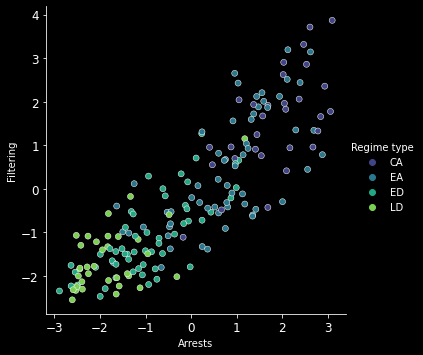

In [137]:
sns.relplot(x="Arrests", y="SM surv.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Arrests", y="SM cens.",  ci=None, hue="Regime type", data=df_small, palette='viridis')
sns.relplot(x="Arrests", y="Filtering",  ci=None, hue="Regime type", data=df_small, palette='viridis')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

## Vigilancia de las redes sociales

In [ ]:
# arrestos, censura rrss, filtrados

TypeError: plot got an unexpected keyword argument 'x'

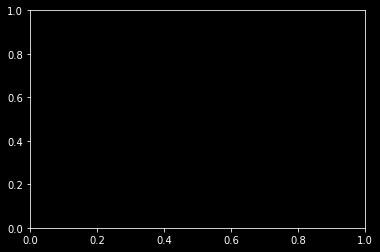

In [49]:
plt.plot(x='Arrests', y='SM surv.', kind="line", data=df_after)
# plt.plot(df_small['Arrests'], df_small['Filtering'])
# plt.plot(df_small['Arrests'], df_small['SM cens.']);
#plt.plot(df_small['Arrests'], df_small['Arrests']);

In [ ]:
sns.relplot(x="PP disinfo", y="GOV disinfo", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [ ]:
sns.relplot(x="PP disinfo", y="GOV disinfo", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [ ]:
sns.relplot(x="PP disinfo", y="GOV disinfo", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [ ]:
df.groupby('Region')[['Digital Repression Index 2021']].mean().sort_values(by='Digital Repression Index 2021', ascending=True).plot(figsize=(10, 7), legend=False);
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Digital Repression Index 2021', fontsize=12);
#plt.legend('V-Dem Liberal Democracy Index 2021', loc='upper right', prop={'size': 18});

In [ ]:
# plt.figure(figsize=(15,10))

sns.relplot(x="PP disinfo", y="GOV disinfo", kind="line", ci=None, hue="Regime type", data=df_small, palette='viridis')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.legend(loc='lower right', prop={'size': 13})
;